## Import Libraries and Functions

### import libraries

In [126]:
import pandas as pd
import numpy as np
from empiricaldist import Pmf
from empiricaldist import Cdf
pmf = Pmf.from_seq
cdf = Cdf.from_seq

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

from scipy.stats import norm
from scipy.stats import linregress
import statsmodels.formula.api as smf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### define funcitons

brfss.hdf5 gss.hdf5   nsfg.hdf5


### datasets

In [41]:
!ls datasets

brfss.hdf5 gss.hdf5   nsfg.hdf5


## Read Data

In [71]:
gss = pd.read_hdf('datasets/gss.hdf5')
gss.head()

brfss = pd.read_hdf('datasets/brfss.hdf5')
brfss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


### simple Calculations

In [43]:
pmf_year = pmf(gss['year'],normalize=False)
pmf_year.head()

1972    1613
1973    1504
1974    1484
1975    1490
1976    1499
Name: year, dtype: int64

234.00    0.000414
236.50    0.000955
245.00    0.001333
259.00    0.001928
267.75    0.002198
Name: realinc, dtype: float64

array(43426.)

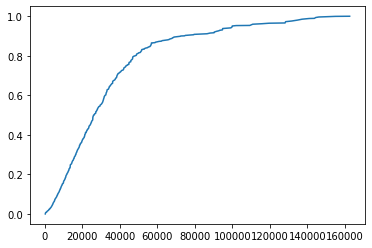

In [51]:
#create a cdf of the income variable
cdf_income = cdf(gss['realinc'])
cdf_income.head()

#show the cdf curve
cdf_income.plot()

##get the 75% percentile
cdf_income.inverse(.75)

## Compare Distributions

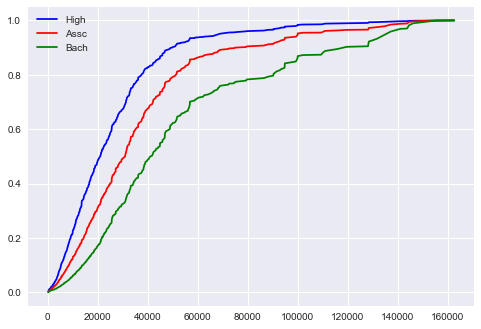

In [116]:
## Calculate the cdf for each distribuition
high = cdf(gss[gss['educ']<=12]['realinc'])

f1 = gss['educ']>=14
f2 = gss['educ']<16
assc = cdf(gss[f1 & f2]['realinc'])

bach = cdf(gss[gss['educ']>=16]['realinc'])

##plot the comparison
fig, ax = plt.subplots()
ax.plot(high,label='High',color='b')
ax.plot(assc,label='Assc',color='r')
ax.plot(bach,label='Bach',color='g')
ax.legend()

## Modeling Distributions

### Compare CDF and Normal

Text(0.5, 0, 'log10 of realinc')

Text(0, 0.5, 'CDF')

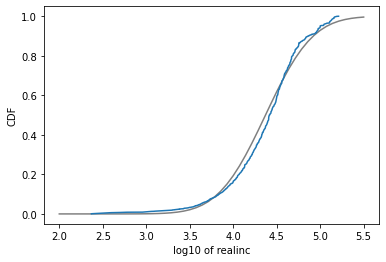

In [67]:
#get the log value sfrom the income
income = gss['realinc']
log_income = np.log10(income)

#create a normal distribuition based on the mean and std of the log values
dist = norm(log_income.mean(),log_income.std())

# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
cdf(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

### Compare PDF and Normal

Text(0.5, 0, 'log10 of realinc')

Text(0, 0.5, 'PDF')

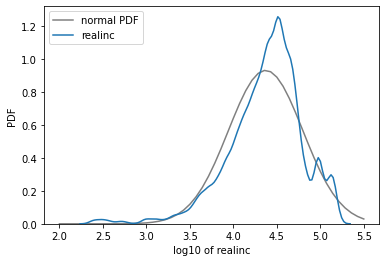

In [69]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray',label='normal PDF')

# Plot the data KDE
sns.kdeplot(log_income)

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()

## Exploring Relationships

### PMF

Text(0.5, 0, 'Age in years')

Text(0, 0.5, 'PMF')

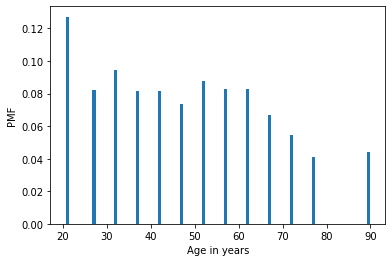

In [72]:
# Extract age
age = brfss['AGE']

# Plot the PMF
pmf(age).bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

### Scatter and Jitter

[Text(0, 0.5, 'Weight in kg'), Text(0.5, 0, 'Age in years')]

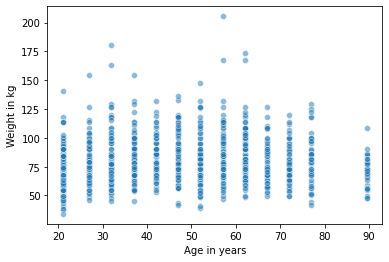

In [95]:
# Select the first 1000 respondents
brfss = brfss[:1000]

fig,ax = plt.subplots()

sns.scatterplot(data=brfss,x='AGE',y='WTKG3',alpha=0.5,ax=ax)
ax.set(xlabel='Age in years',ylabel='Weight in kg')

[Text(0, 0.5, 'Weight in kg'), Text(0.5, 0, 'Age in years')]

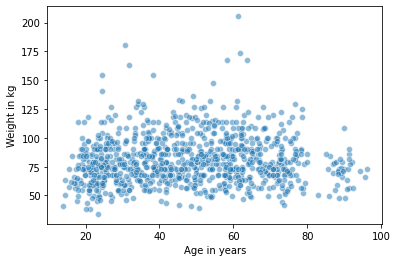

In [98]:
## Add Jittering
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0,2.5,size=len(brfss))
# Extract weight
weight = brfss['WTKG3']

fig,ax = plt.subplots()
sns.scatterplot(age,weight,alpha=0.5,ax=ax)
ax.set(xlabel='Age in years',ylabel='Weight in kg')

### Boxplot

Text(0.5, 0, 'Height in cm')

Text(0, 0.5, 'Weight in kg')

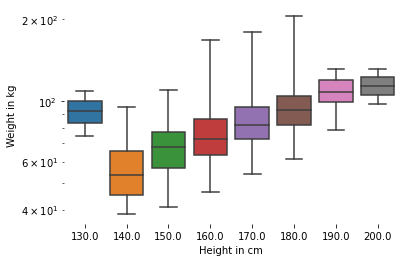

In [99]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(data=data,y='WTKG3',x='_HTMG10',whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Text(0.5, 0, 'Income level')

Text(0, 0.5, 'PMF')

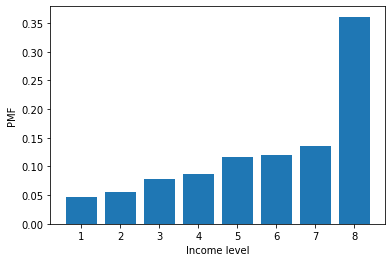

In [100]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
pmf(income).bar()


# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

### Correlation

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


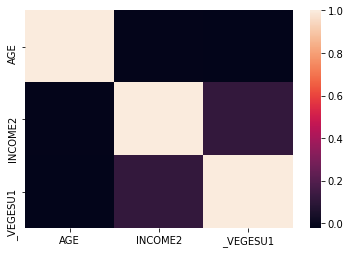

In [102]:
# Select columns
columns = ['AGE', 'INCOME2','_VEGESU1']
subset = brfss[columns]

# Compute the correlation matrix
print(subset.corr())

sns.heatmap(subset.corr())

### Linear Regression

In [105]:
# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

# Compute the linear regression
res = linregress(xs,ys)
print(res)

## Means 0.07 more vegetable servings per income bracket

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


Text(0.5, 0, 'Income code')

Text(0, 0.5, 'Vegetable servings per day')

(0.0, 6.0)

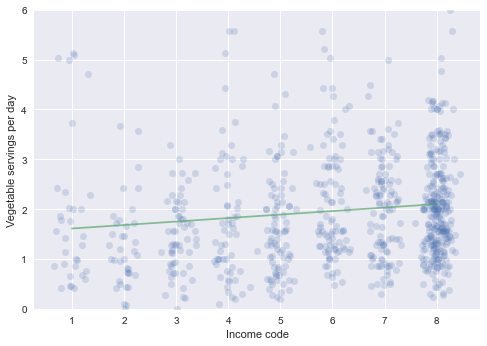

In [117]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)

# Plot the line of best fit
fx = np.array([xs.min(),xs.max()])
fy = res.intercept+res.slope*fx
plt.plot(fx, fy, '-', alpha=0.7)

plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

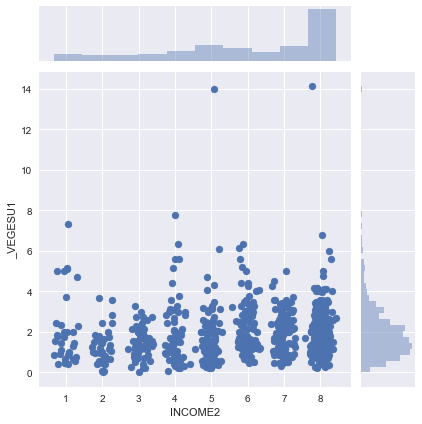

In [124]:
sns.jointplot(x_jitter,ys)

In [128]:
# Run regression with linregress
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

# Run regression with StatsModels ( Called OMS )
results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


In [130]:
# Run regression with StatsModels ( Called OMS )
results = smf.ols('INCOME2 ~ _VEGESU1', data = brfss).fit()
print(results.params)

Intercept    5.579385
_VEGESU1     0.189795
dtype: float64


### Multi variate regression

Text(0.5, 0, 'Education (years)')

Text(0, 0.5, 'Income (1986 $)')

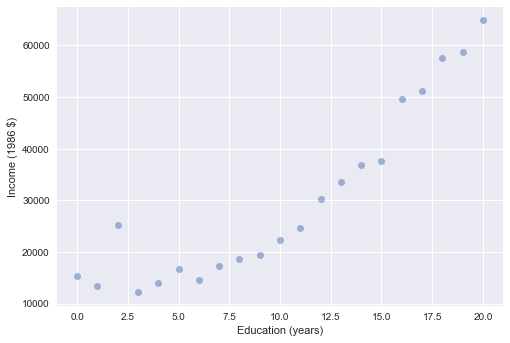

In [133]:
# Group by educ
grouped = gss.groupby('educ')

# Compute mean income in each group
mean_income_by_educ = grouped['realinc'].mean()

# Plot mean income as a scatter plot
plt.clf()
plt.plot(mean_income_by_educ, 'o', alpha=0.5)

# Label the axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.show()

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64
0    12182.344976
1    11993.358518
2    11857.672098
3    11775.285717
4    11746.199374
dtype: float64


Text(0.5, 0, 'Education (years)')

Text(0, 0.5, 'Income (1986 $)')

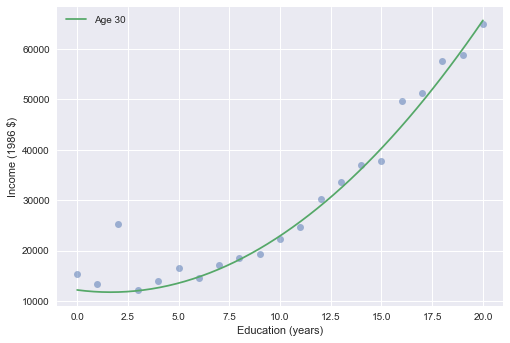

In [138]:
##Analyse the income and years of study controlled by age

# Add a new column with educ squared
gss['educ2'] = gss['educ']**2
gss['age2'] = gss['age']**2

# Run a regression model with educ, educ2, age, and age2
results = smf.ols('realinc ~ educ+educ2+age+age2',data=gss).fit()

# Print the estimated parameters
print(results.params)

# Make the DataFrame
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ']**2
df['age2'] = df['age']**2

# Generate and plot the predictions
pred = results.predict(df)
print(pred.head())

# Plot mean income in each age group
plt.clf()
grouped = gss.groupby('educ')
mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ,'o',alpha=0.5)

# Plot the predictions
pred = results.predict(df)
plt.plot(df['educ'],pred,label='Age 30')

# Label axes
plt.xlabel('Education (years)')
plt.ylabel('Income (1986 $)')
plt.legend()
plt.show()

### Logistic Regression

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability of favoring legalization')

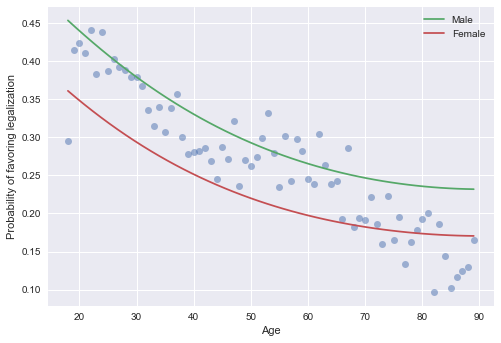

In [141]:
#Analyze response about legalization of weed

#grass=1 means in favor
#grass=2 means against

#sex=1 means male
#sex=0 menas female

# Recode grass, converting against to zero
# Recode grass
gss['grass'].replace(2, 0, inplace=True)

# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2

# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2

# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.plot(favor_by_age, 'o', alpha=0.5)

plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')

plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()
#sex is negative correlated and has a medium value indicating that woman tend to be against